In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Planning: Main Objective

To practice Exploratory Data Analysis and Data Visualization by investigating whether overall Data Science job trends and how it relates to overall salary 

**Questions**: 

- COMMON JOBS EDA: What are the 10 most common job titles? And is it because of its salary?
- HIGH SALARY EDA: Which 10 job titles have the highest average salaries?
- COMPANY SIZE EDA: Is there a relationship between company size and salary?

## 2. Gathering/Reading Data 

Data scraped by RUCHI BHATIA's Data Science Job Salaries dataset from Kaggle

In [2]:
df = pd.read_csv('C:/Users/leena/data_salary_proj/ds_salaries.csv')

## 3. Cleaning Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [4]:
df.shape

(607, 12)

In [5]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [6]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [7]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## 3. Data Distribution

Text(0, 0.5, 'Count')

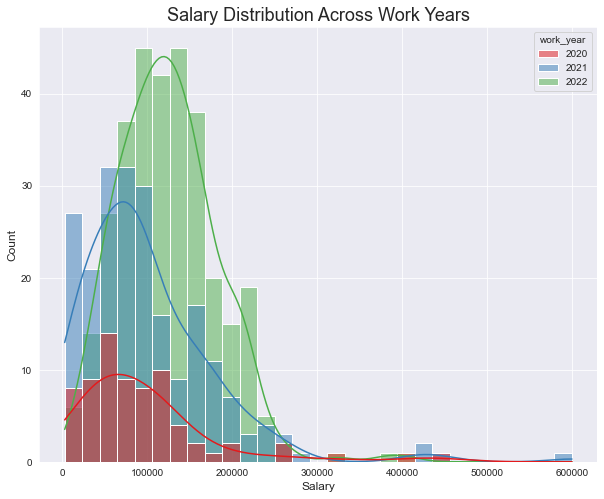

In [109]:
plt.figure(figsize=(10,8))

sns.set_style('darkgrid')
sns.histplot(data = df, x = 'salary_in_usd', hue = 'work_year', palette='Set1', kde = True)
plt.title('Salary Distribution Across Work Years', fontsize = 18)
plt.xlabel('Salary', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

C:\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

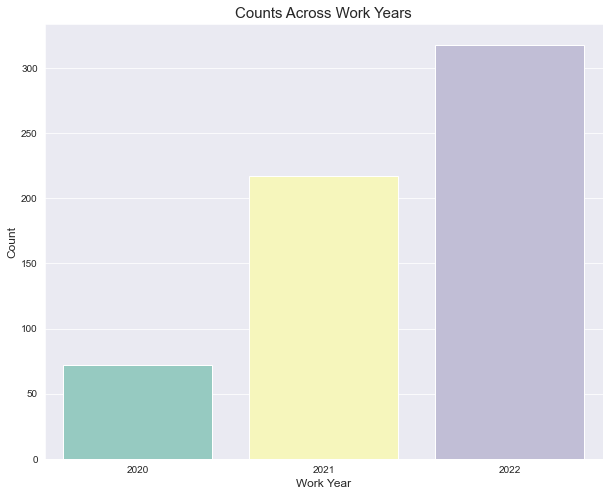

In [115]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.countplot(df['work_year'], palette='Set3')
plt.title('Counts Across Work Years', fontsize = 15)
plt.xlabel('Work Year', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

**Key Takeaways:** Datapoints from this dataset are from people who started working in these data science jobs in the year of 2022. This could be due to the higher demand of the job, which is suggested by its increased overall salary over time.

In [120]:
df['Count'] = 1
work_year = df.groupby(['work_year']).sum().reset_index()
work_year

,work_year,salary,salary_in_usd,remote_ratio,Count
0,2020,27531809,6898536,4650,72
1,2021,118628993,21668273,15000,217
2,2022,50507236,39597998,23400,318


In [122]:
year1 = work_year.at[0, 'Count']
year2 = work_year.at[1, 'Count']
year3 = work_year.at[2, 'Count']

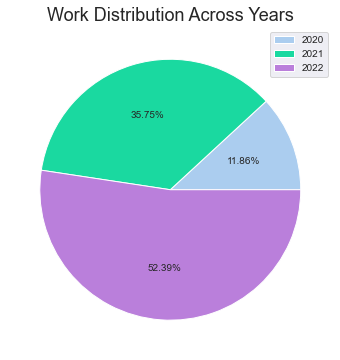

In [126]:
years = [year1, year2, year3]
colors = ['#abcdef','#1ad9a0', '#ba7fdb']
labels = ['2020', '2021', '2022']

plt.figure(figsize=(6,6))

plt.pie(years, colors = colors, autopct = '%.2f%%' )
plt.legend(labels)
plt.title('Work Distribution Across Years', fontsize = 18)
plt.show()

## 4. EDA: Visualizations and Observations

### 1. Common Job Titles EDA

In [35]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Count
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,1
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,1
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,1
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,1
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,1


In [9]:
df['Count'] = 1
common_job = df.groupby('job_title').sum(['Count'])
common_job = common_job['Count'].reset_index()
common_job = common_job.sort_values(['Count'], ascending = False).reset_index().head(10)
common_job = common_job.drop(['index'], axis = 1)
common_job

,job_title,Count
0,Data Scientist,143
1,Data Engineer,132
2,Data Analyst,97
3,Machine Learning Engineer,41
4,Research Scientist,16
5,Data Science Manager,12
6,Data Architect,11
7,Big Data Engineer,8
8,Machine Learning Scientist,8
9,Director of Data Science,7


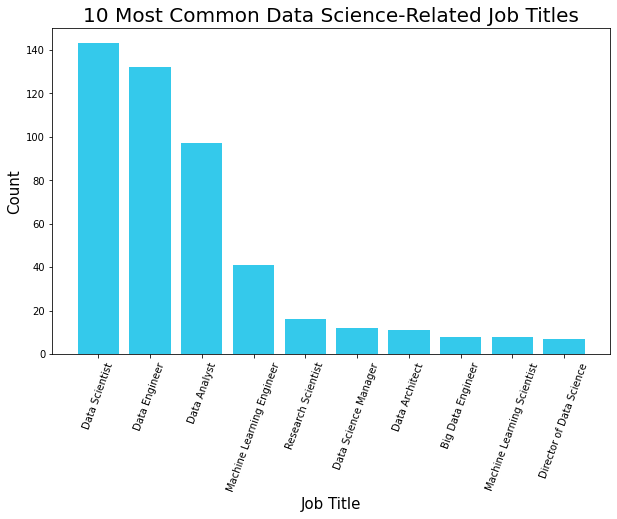

In [52]:
plt.figure(figsize=(10,6))
plt.bar(common_job.job_title, common_job.Count, color = '#34c9eb')

plt.xticks(rotation = 70)
plt.title('10 Most Common Data Science-Related Job Titles', fontsize = 20)
plt.xlabel('Job Title', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

In [11]:
all_jobs = df.groupby('job_title').sum(['Count'])
all_jobs = all_jobs['Count'].reset_index()
all_jobs = all_jobs.sort_values(['Count'], ascending = False)

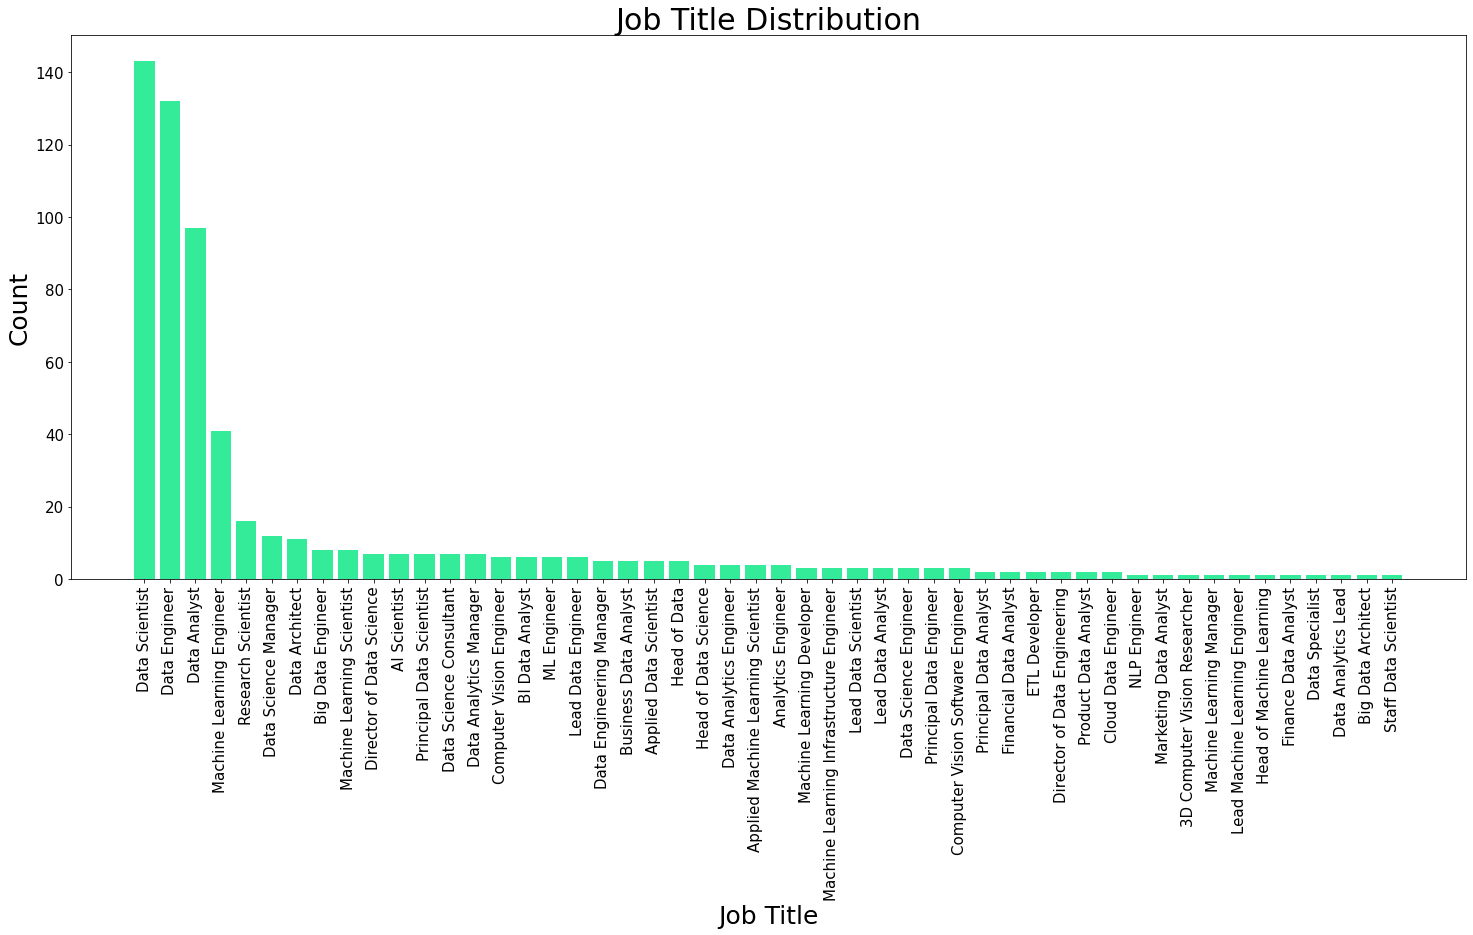

In [12]:
plt.figure(figsize=(25,10))
plt.bar(all_jobs.job_title, all_jobs.Count, color = '#34eb99')

plt.xticks(rotation = 'vertical', fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Job Title Distribution', fontsize = 30)
plt.xlabel('Job Title', fontsize = 25)
plt.ylabel('Count', fontsize = 25)

plt.show()

**Key takeaways:** From the bar chart above, 'Data Scientist', 'Data Engineer', and 'Data Analyst' are most common job titles for data science related occupations. There are 50 total unique job titles, yet these three make up the majority of job listings.

In [44]:
# common_job_sal

common_job_sal = df.groupby('job_title').mean(['salary_in_usd']).reset_index()
common_job_sal = common_job_sal[['job_title', 'salary_in_usd']]
common_job_sal = common_job_sal.iloc[[22, 17, 12, 38, 48, 21, 16, 7, 41, 25]].reset_index()
common_job_sal = common_job_sal.drop(['index'], axis = 1)
common_job_sal

,job_title,salary_in_usd
0,Data Scientist,108187.832168
1,Data Engineer,112725.000000
2,Data Analyst,92893.061856
3,Machine Learning Engineer,104880.146341
4,Research Scientist,109019.500000
5,Data Science Manager,158328.500000
6,Data Architect,177873.909091
7,Big Data Engineer,51974.000000
8,Machine Learning Scientist,158412.500000
9,Director of Data Science,195074.000000


C:\Users\leena\AppData\Local\Temp\ipykernel_15468\2127907080.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(common_job.job_title, rotation = 70, size=8)


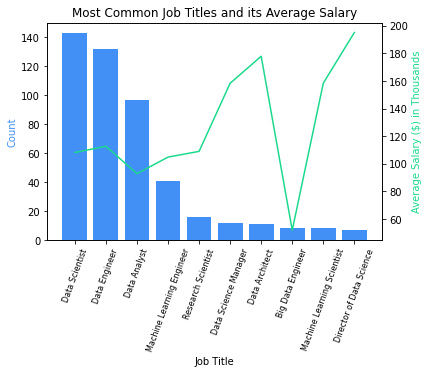

In [56]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(common_job.job_title, common_job.Count, color = '#4290f5')
ax2.plot(common_job.job_title, common_job_sal.salary_in_usd/1000, '#1ad98c')

ax1.set_xlabel('Job Title')
ax1.set_ylabel('Count', color='#4290f5')
ax1.set_xticklabels(common_job.job_title, rotation = 70, size=8)
ax2.set_ylabel('Average Salary ($) in Thousands', color='#1ad98c')
plt.title('Most Common Job Titles and its Average Salary')

plt.show()

**Key Takeaways:** The most common job titles (as in, the top 3 that make up majority of the job listings in the data) do not seem to have the highest average salary. This suggests that these job titles are not necessarily the most common because of its high salary, but based on different factors. 

### 2. Highest Salary EDA

In [83]:
# top 10 highest salary jobs
salary = df.groupby('job_title').mean().reset_index()
salary = salary[['job_title', 'salary_in_usd']]
salary = salary.sort_values(['salary_in_usd'], ascending = False).reset_index()
salary = salary.drop(['index'], axis=1)
salary.head()

,job_title,salary_in_usd
0,Data Analytics Lead,405000.000000
1,Principal Data Engineer,328333.333333
2,Financial Data Analyst,275000.000000
3,Principal Data Scientist,215242.428571
4,Director of Data Science,195074.000000


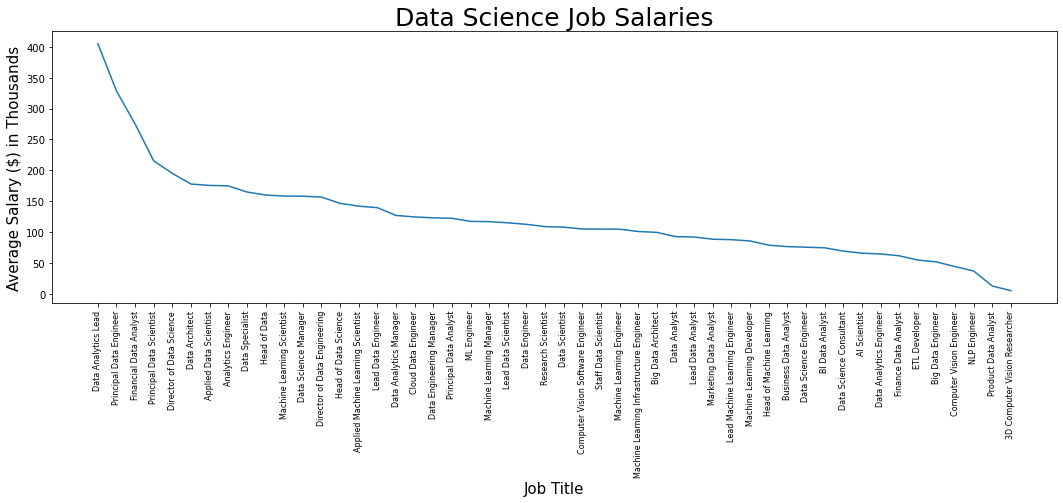

In [88]:
plt.figure(figsize = (18,5))

plt.plot(salary.job_title, salary.salary_in_usd/1000)
plt.xlabel('Job Title', fontsize = 15)
plt.ylabel('Average Salary ($) in Thousands', fontsize = 15)
plt.title('Data Science Job Salaries', fontsize = 25)

plt.xticks(salary.job_title, rotation = 'vertical', fontsize = 8)

plt.show()

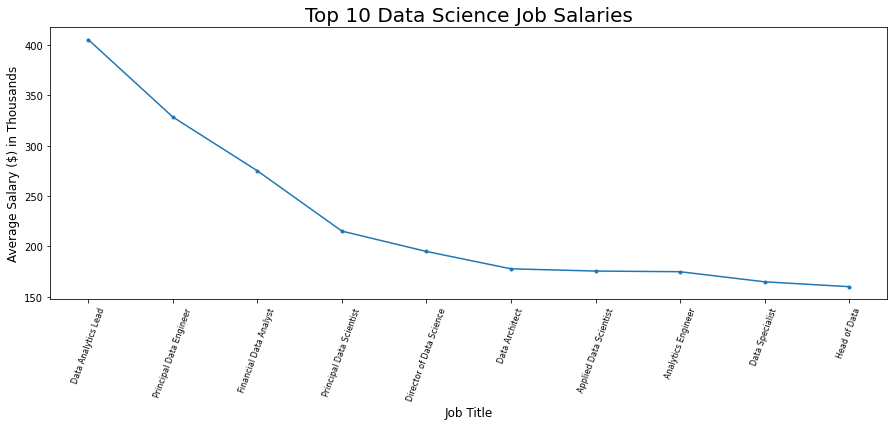

In [99]:
top_salary = salary.head(10)

plt.figure(figsize = (15,5))

plt.plot(top_salary.job_title, top_salary.salary_in_usd/1000, '.-')
plt.xlabel('Job Title', fontsize = 12)
plt.ylabel('Average Salary ($) in Thousands', fontsize = 12)
plt.title('Top 10 Data Science Job Salaries', fontsize = 20)

plt.xticks(top_salary.job_title, rotation = 70, fontsize = 8)

plt.show()


**Key Takeaways:** Data Analytics Lead, Principal Data Engineer, and Financial Data Analyst hold the highest average salary job titles